In [54]:
import pandas as pd
import numpy as np
from datetime import datetime
import time
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

pd.plotting.register_matplotlib_converters() 
%matplotlib inline

In [55]:
marathon = pd.read_csv('activity2022csv.csv')

In [56]:
marathon.head()

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg GAP,Avg HR,Max HR,Total Ascent,Total Descent,...,Avg Vertical Oscillation,Avg Vertical Ratio,Calories,Avg Temperature,Best Pace,Max Run Cadence,Moving Time,Avg Moving Pace,Beers Earned,Beers Earned.1
0,1,6:03.8,6:03.8,1.0,6:04,--,145,153,32,21,...,--,--,58,--,4:32,170,6:03.8,6:04,0.4,0.4
1,2,6:20.7,12:24,1.0,6:21,--,153,160,45,43,...,--,--,66,--,5:23,168,6:20,6:20,0.4,0.4
2,3,6:19.0,18:43,1.0,6:19,--,153,159,40,29,...,--,--,64,--,4:56,168,6:19.0,6:19,0.5,0.5
3,4,5:44.6,24:28,1.0,5:45,--,155,165,30,32,...,--,--,59,--,5:08,165,5:44,5:44,0.3,0.3
4,5,6:37.1,31:05,1.0,6:37,--,154,161,22,43,...,--,--,66,--,5:19,165,6:33,6:33,0.5,0.5


In [57]:
marathon.tail()

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg GAP,Avg HR,Max HR,Total Ascent,Total Descent,...,Avg Vertical Oscillation,Avg Vertical Ratio,Calories,Avg Temperature,Best Pace,Max Run Cadence,Moving Time,Avg Moving Pace,Beers Earned,Beers Earned.1
39,40,6:21.8,4:26:00,1.00,6:22,--,153,159,56,53,...,--,--,44,--,5:26,242,6:21.8,6:22,0.3,0.3
40,41,5:56.4,4:31:56,1.00,5:56,--,157,162,35,34,...,--,--,50,--,4:54,170,5:56,5:56,0.3,0.3
41,42,5:47.0,4:37:43,1.00,5:47,--,158,164,55,33,...,--,--,48,--,5:26,172,5:47,5:47,0.4,0.4
42,43,1:41.6,4:39:25,0.32,5:22,--,162,164,11,26,...,--,--,16,--,4:15,168,1:41,5:20,0.1,0.1
43,Summary,4:39:25,4:39:25,42.32,6:36,NaN,151,165,"1,675","1,653",...,NaN,NaN,"2,036",NaN,4:15,242,4:37:07,6:33,--,--


In [58]:
marathon.columns

Index(['Laps', 'Time', 'Cumulative Time', 'Distance', 'Avg Pace', 'Avg GAP',
       'Avg HR', 'Max HR', 'Total Ascent', 'Total Descent', 'Avg Power',
       'Avg W/kg', 'Max Power', 'Max W/kg', 'Avg Run Cadence',
       'Avg Ground Contact Time', 'Avg GCT Balance', 'Avg Stride Length',
       'Avg Vertical Oscillation', 'Avg Vertical Ratio', 'Calories',
       'Avg Temperature', 'Best Pace', 'Max Run Cadence', 'Moving Time',
       'Avg Moving Pace', 'Beers Earned', 'Beers Earned.1'],
      dtype='object')

In [59]:
marathon.dtypes

Laps                         object
Time                         object
Cumulative Time              object
Distance                    float64
Avg Pace                     object
Avg GAP                      object
Avg HR                        int64
Max HR                        int64
Total Ascent                 object
Total Descent                object
Avg Power                    object
Avg W/kg                     object
Max Power                    object
Max W/kg                     object
Avg Run Cadence               int64
Avg Ground Contact Time      object
Avg GCT Balance              object
Avg Stride Length           float64
Avg Vertical Oscillation     object
Avg Vertical Ratio           object
Calories                     object
Avg Temperature              object
Best Pace                    object
Max Run Cadence               int64
Moving Time                  object
Avg Moving Pace              object
Beers Earned                 object
Beers Earned.1              

In [60]:
marathon['Avg HR'].mean()

150.8409090909091

In [61]:
marathon['Avg HR'].describe()

count     44.000000
mean     150.840909
std        4.040166
min      144.000000
25%      148.000000
50%      150.500000
75%      154.000000
max      162.000000
Name: Avg HR, dtype: float64

In [62]:
marathon['Total Ascent'].describe()

count     44
unique    29
top       40
freq       3
Name: Total Ascent, dtype: object

In [63]:
marathon = pd.read_csv('activity2022csv.csv')

In [64]:
marathon = marathon.drop([marathon.index[43]])

In [96]:
marathon['Laps'] = pd.to_numeric(marathon['Laps'])
marathon['Total Ascent'] = pd.to_numeric(marathon['Total Ascent'])
marathon['Total Descent'] = pd.to_numeric(marathon['Total Descent'])
marathon['Calories'] = pd.to_numeric(marathon['Calories'])
marathon['Beers Earned'] = pd.to_numeric(marathon['Beers Earned'])

In [97]:
marathon['Mov Time'] = pd.to_datetime(marathon['Moving Time'])

In [98]:
#marathon['Mov Time'] = datetime.strptime(marathon['Moving Time'] '%H:%M:%S')

In [99]:
marathon.dtypes

Laps                                 int64
Time                                object
Cumulative Time                     object
Distance                           float64
Avg Pace                            object
Avg GAP                             object
Avg HR                               int64
Max HR                               int64
Total Ascent                         int64
Total Descent                        int64
Avg Power                           object
Avg W/kg                            object
Max Power                           object
Max W/kg                            object
Avg Run Cadence                      int64
Avg Ground Contact Time             object
Avg GCT Balance                     object
Avg Stride Length                  float64
Avg Vertical Oscillation            object
Avg Vertical Ratio                  object
Calories                             int64
Avg Temperature                     object
Best Pace                           object
Max Run Cad

In [175]:
xy = marathon['Mov Time'].mean()

In [176]:
xyz = xy.time()
print(xyz)

06:26:39.767441


In [71]:
marathon['Net Ascent'] = marathon['Total Ascent']-marathon['Total Descent']

In [72]:
marathon.head()

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg GAP,Avg HR,Max HR,Total Ascent,Total Descent,...,Calories,Avg Temperature,Best Pace,Max Run Cadence,Moving Time,Avg Moving Pace,Beers Earned,Beers Earned.1,Mov Time,Net Ascent
0,1,6:03.8,6:03.8,1.0,6:04,--,145,153,32,21,...,58,--,4:32,170,6:03.8,6:04,0.4,0.4,2023-02-11 06:03:48,11
1,2,6:20.7,12:24,1.0,6:21,--,153,160,45,43,...,66,--,5:23,168,6:20,6:20,0.4,0.4,2023-02-11 06:20:00,2
2,3,6:19.0,18:43,1.0,6:19,--,153,159,40,29,...,64,--,4:56,168,6:19.0,6:19,0.5,0.5,2023-02-11 06:19:00,11
3,4,5:44.6,24:28,1.0,5:45,--,155,165,30,32,...,59,--,5:08,165,5:44,5:44,0.3,0.3,2023-02-11 05:44:00,-2
4,5,6:37.1,31:05,1.0,6:37,--,154,161,22,43,...,66,--,5:19,165,6:33,6:33,0.5,0.5,2023-02-11 06:33:00,-21


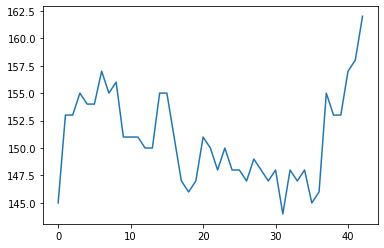

In [73]:
marathon['Avg HR'].plot(kind='line')

In [74]:
marathon.tail()

,Laps,Time,Cumulative Time,Distance,Avg Pace,Avg GAP,Avg HR,Max HR,Total Ascent,Total Descent,...,Calories,Avg Temperature,Best Pace,Max Run Cadence,Moving Time,Avg Moving Pace,Beers Earned,Beers Earned.1,Mov Time,Net Ascent
38,39,6:23.0,4:19:38,1.00,6:23,--,153,159,50,56,...,47,--,5:35,168,6:23.0,6:23,0.3,0.3,2023-02-11 06:23:00,-6
39,40,6:21.8,4:26:00,1.00,6:22,--,153,159,56,53,...,44,--,5:26,242,6:21.8,6:22,0.3,0.3,2023-02-11 06:21:48,3
40,41,5:56.4,4:31:56,1.00,5:56,--,157,162,35,34,...,50,--,4:54,170,5:56,5:56,0.3,0.3,2023-02-11 05:56:00,1
41,42,5:47.0,4:37:43,1.00,5:47,--,158,164,55,33,...,48,--,5:26,172,5:47,5:47,0.4,0.4,2023-02-11 05:47:00,22
42,43,1:41.6,4:39:25,0.32,5:22,--,162,164,11,26,...,16,--,4:15,168,1:41,5:20,0.1,0.1,2023-02-11 01:41:00,-15


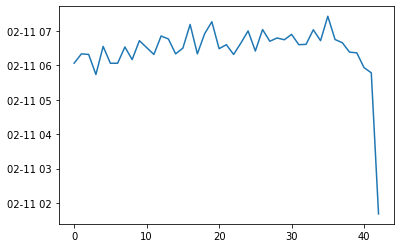

In [75]:
marathon['Mov Time'].plot(kind='line')

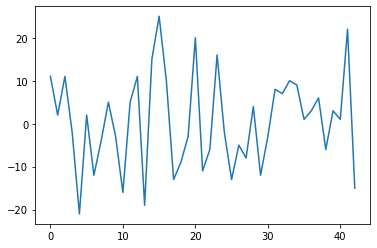

In [76]:
marathon['Net Ascent'].plot(kind='line')

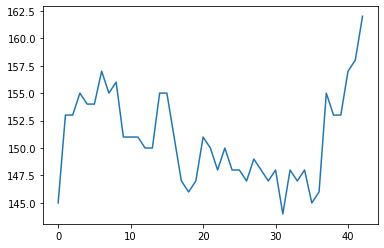

In [77]:
marathon['Avg HR'].plot(kind='line')

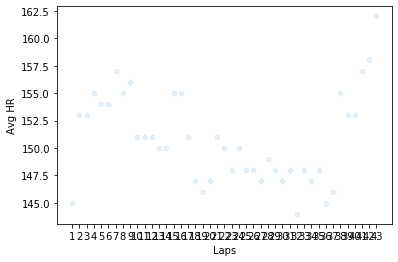

In [78]:
marathon.plot.scatter(x='Laps', y='Avg HR', alpha=.1)

In [169]:
be = marathon['Beers Earned'] # dependent variable
na = marathon[['Net Ascent']] # independent variable
sl = marathon['Avg Stride Length'] #another dependent variable
hr = marathon['Avg HR'] #another dependent variable
td = marathon[['Total Descent']] # independent variable

In [170]:
lm = linear_model.LinearRegression()
lm.fit(na,be) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [171]:
lm.predict(na)

array([0.33139707, 0.31836663, 0.33139707, 0.31257533, 0.28506663,
       0.31836663, 0.29809707, 0.30967968, 0.32271011, 0.3111275 ,
       0.29230576, 0.32271011, 0.33139707, 0.28796228, 0.33718837,
       0.35166664, 0.32994924, 0.29664924, 0.30244054, 0.3111275 ,
       0.34442751, 0.29954489, 0.30678402, 0.3386362 , 0.31257533,
       0.29664924, 0.30823185, 0.30388837, 0.32126229, 0.29809707,
       0.3111275 , 0.32705359, 0.32560576, 0.32994924, 0.32850142,
       0.31691881, 0.31981446, 0.32415794, 0.30678402, 0.31981446,
       0.31691881, 0.34732316, 0.29375359])

In [172]:
lm.score(na, be)

0.039023630537348475

In [173]:
lm.intercept_

0.3154709807016286

In [174]:
lm.coef_

array([0.00144783])

In [158]:
na.describe()

,Net Ascent
count,43.000000
mean,0.558140
std,11.112632
min,-21.000000
25%,-7.000000
50%,1.000000
75%,8.500000
max,25.000000


In [164]:
lm2 = linear_model.LinearRegression()
lm2.fit(na,hr) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [165]:
lm2.score(na, hr)

0.0027419384974317618

In [161]:
sl.describe()

count    43.000000
mean      1.021163
std       0.060483
min       0.890000
25%       0.990000
50%       1.030000
75%       1.050000
max       1.200000
Name: Avg Stride Length, dtype: float64

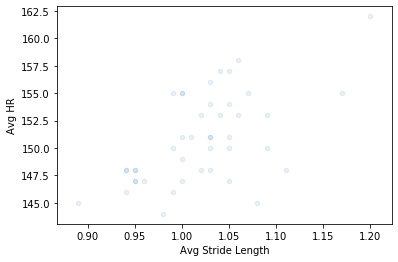

In [167]:
marathon.plot.scatter(x='Avg Stride Length', y='Avg HR', alpha=.1)

In [179]:
lm3 = linear_model.LinearRegression()
lm3.fit(td,hr) # fitting the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
lm3.score(td, hr)

0.05746902391140884